<a href="https://colab.research.google.com/github/diogocarneiro20/Identificarfraudesnocartaodecredito/blob/main/c_pia_de_projeto_ii_primeiro_semestre_2023_futuro_dos_dados_e_aplica_o_de_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome do Acadêmico:** Diogo de Paiva Carneiro

**Matrícula:** 3289185

--------------------------------------------------

**Nome do Acadêmico:** Suzana Aparecida Alves

**Matrícula:** 2468442

 # Definição do Tema

 ## Análise Fraudes Cartão de Crédito

 Com o aumento das compras on-line e o uso recorrente de cartão de crédito, ocorre também o aumento de golpes e fraudes em cartões.

 Os dados que usaremos neste projeto foi disponibilizada por uma companhia de cartão de crédito e exportada via [credicardfraude.csv]( https://query.data.world/s/vooll7is6lvtoortk377jxlsu2u5iz?dws=00000).

 ### Sobre a Base de Dados

Essa base de dados contém apenas variáveis ​​de entrada numéricas que foram obtidas através de uma transformação feita a partir de um [PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) e devido a questões de confidencialidade e proteção de dados, a empresa que disponibilizou esses dados não pode fornecer quais são os parãmetros originais e mais informações básicas sobre os dados.
Abaixo seguem listadas o que se trata cada uma dessas váriaveis.

#### V1,V2,V3...
  São as principais infomações desse estudo que foram obtidas com PCA;

#### Time
  Aqui estão os segundos que decorreram entre cada transação feita;

#### Amount
 Basicamente o valor da transação;

#### Class
  Onde está a validação do retorno de fraude, sendo dois indicadores:
  
  #### 1 (Um)
  *em caso de tranzações Fraudulentas*
  #### 0 (Zero)
  *caso a compra seja veridica ou Compras Normais*.



## Objetivo

 O Objetivo aqui é poder identificar operações fraudulentas e que não seja cobrada de forma indevida esses valores dos clientes.

## Especificação Técnica

A base de dados utilizada será de transações feitas em cartões de crédito, esse dataset foi atualizada em 04/04/2023, a mesma está disponibilizada no formato CSV.

Iremos utilizar a biblioteca scikit-learn, onde a mesma é uma biblioteca de aprendizado de máquina de código aberto para Python, com uma gama muito grande de variedade de algoritmos de aprendizado supervisionado e não supervisionado, bem como ferramentas para avaliação de modelos, seleção de modelos e pré-processamento de dados, cabe exatemente para o que iremos precisar aqui.

Utilizaremos alguns métodos dessa biblioteca, como regressão linear, regressão logística, redução de dimensionalidade (PCA, t-SNE) e detecção de anomalias e classificação.




#Importando Bibliotecas e Dados


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib  import gridspec
sns.set_theme()
!pip install -q scikit-plot
import scikitplot as skplt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [ ]:
df = pd.read_csv('https://query.data.world/s/vooll7is6lvtoortk377jxlsu2u5iz?dws=00000')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Checando Tipo de Registros

In [ ]:
print(df.shape)
print('-------')
df.info()

(284807, 31)
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

#Limpeza de registros nulos ou invalidos

Todos os tipos são float, ou seja, números reais, com exceção da variável Class que é um número inteiro. Vamos aproveitar e identificar se há valores ausentes.

In [ ]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Como é possível perceber, não temos nenhum valor ausente, facilitando nossa vida em relação ao tratamento desses dados.

 Vamos explorar alguns dados, vejamos quantas transações são fraudes e quantas são compras de fato.

Fraudulenta: 492 (0.173%)
Compras Normais: 284315 (99.827%)



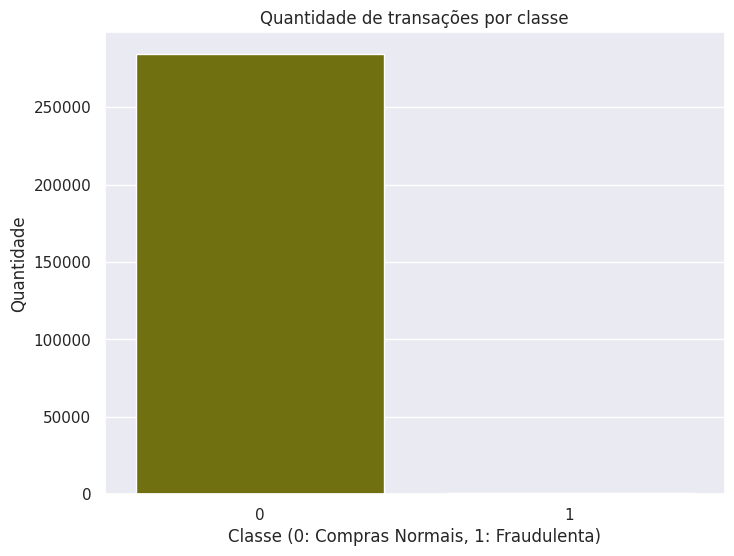

In [ ]:
print(f'Fraudulenta: {df[df.Class == 1].value_counts().sum()} ({(df[df.Class == 1].shape[0] / df.shape[0]) * 100:.3f}%)')
print(f'Compras Normais: {df[df.Class == 0].value_counts().sum()} ({(df[df.Class == 0].shape[0] / df.shape[0]) * 100:.3f}%)\n')

plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(x='Class', data=df, color='#808000')
plt.title("Quantidade de transações por classe")
plt.xlabel("Classe (0: Compras Normais, 1: Fraudulenta)")
plt.ylabel("Quantidade")
plt.show()

#Estatistica

Aqui trago os dados estatisticos somente da Coluna Class, essa coluna traz as variaveis 0 e 1.

Lembrando que 0 é um valor numérico e biario para identificação de **Compras Normais** ou as compras que foram feitas de fato.

Já o 1 é um valor numérico e biario que identifica se é uma transação **Fraudulenta**

In [ ]:
print ("Fraudulenta")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Compras Normais")
print (df.Amount[df.Class == 0].describe())

Fraudulenta
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Compras Normais
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Com as informações que coletamos até o momento, sabemos que de 285 mil transações, 492 delas são fraudelentas sendo a proporção de 0,17%

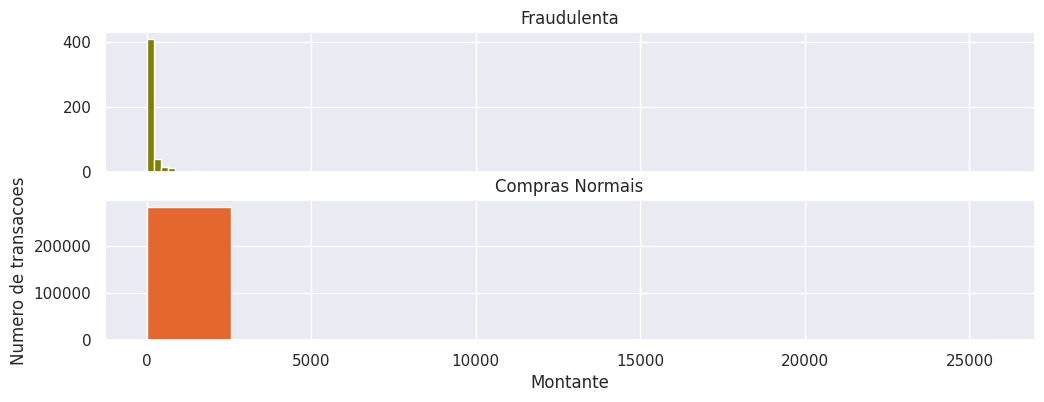

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 10

ax1.hist(df.Amount[df.Class == 1], bins = bins, color='#808000')
ax1.set_title('Fraudulenta')

ax2.hist(df.Amount[df.Class == 0], bins = bins, color='#e4682e')
ax2.set_title('Compras Normais')

plt.xlabel('Montante')
plt.ylabel('Numero de transacoes')
plt.show()


Existe uma diferença muito grande entre as Compras Normais e as Fraudulentas, esses dados irão gerar impacto no nosso ML, sendo necessario balancear as proporções.

Outro ponto importante para observarmos, é a distribuição dessas quantidades e comparar se existe um padrão entre elas.

#Explorando Recursos

Vamos ver como se comportam cada uma das classes

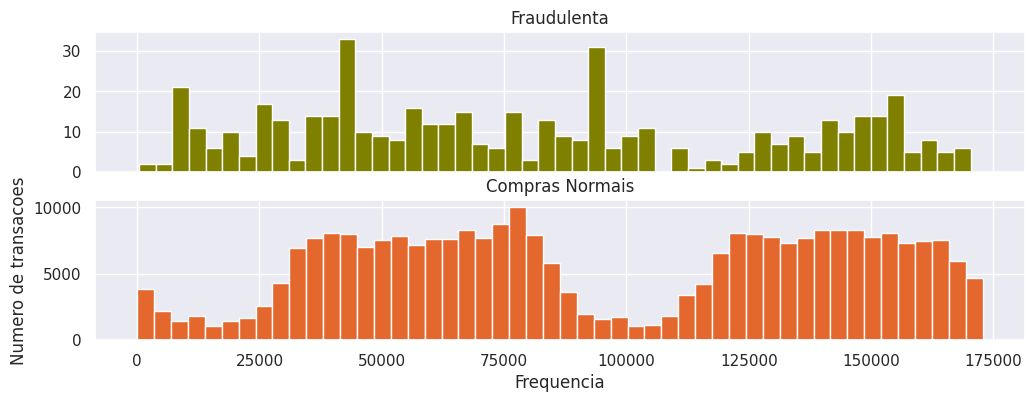

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins, color='#808000')
ax1.set_title('Fraudulenta')

ax2.hist(df.Time[df.Class == 0], bins = bins, color='#e4682e')
ax2.set_title('Compras Normais')

plt.xlabel('Frequencia')
plt.ylabel('Numero de transacoes')
plt.show()

Ao que se percebe nos gráficos acima, é que transações Fraudulentas são distribuídos de forma mais uniforme, ou seja, os valores estão distribuídos de maneira mais igual, Nesse caso, a probabilidade de ocorrência de cada valor é aproximadamente a mesma em todo o intervalo.

Já as transaçõs de Compras Normais, são distribuidas de maneira mais ciclica, nesse caso, refere-se a um padrão de variação nos dados que se repete em intervalos regulares ao longo do tempo.


Nosso próximo passo é analisar a distribuição e identificar outliers.


*Outliers são valores ou observações em um conjunto de dados que são significativamente diferentes da maioria das outras observações. Eles podem ser muito maiores ou menores do que a maioria dos outros pontos de dados e, muitas vezes, parecem desvios ou anomalias em relação à tendência geral ou padrão nos dados. Outliers podem ocorrer por várias razões, como erros de medição, erros de registro, variações naturais ou eventos incomuns.*

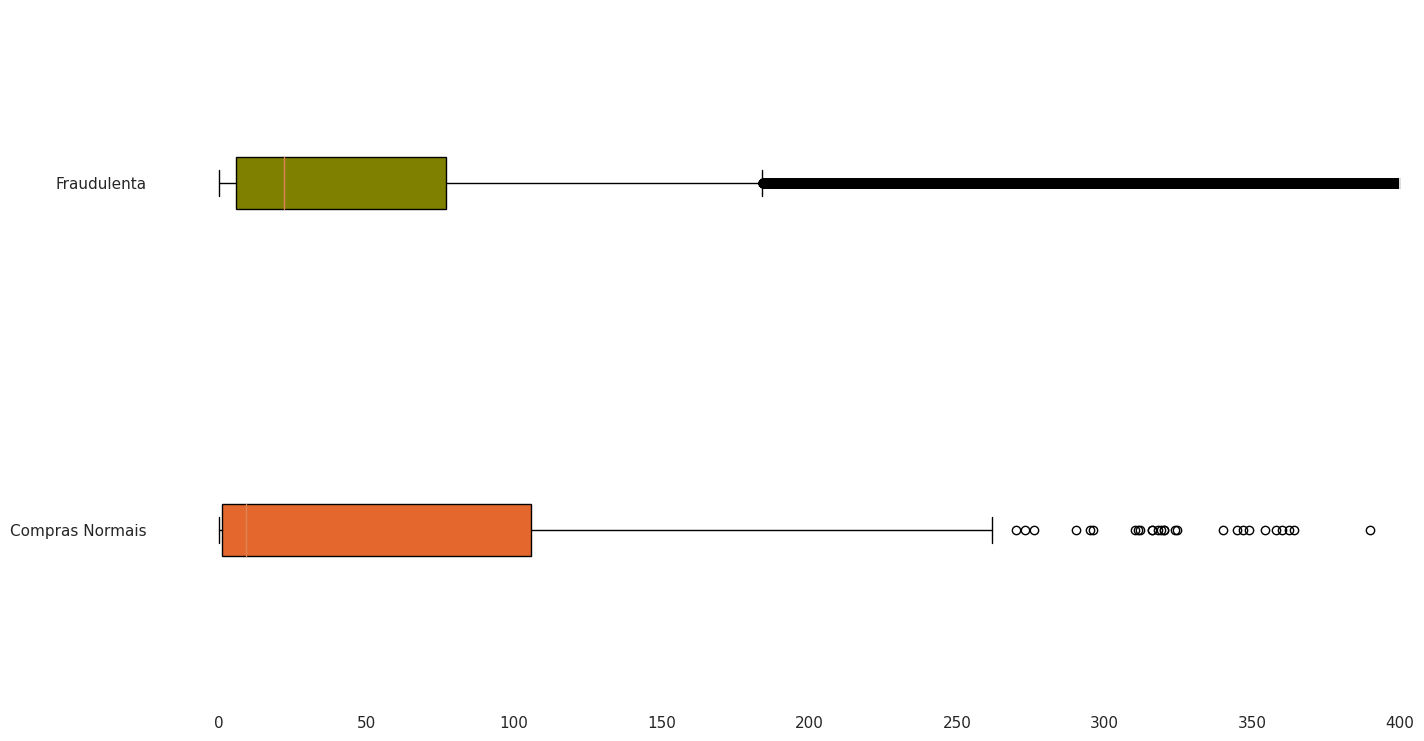

In [ ]:
ax, fig = plt.subplots(figsize=(16,9))
c = "purple"
box = plt.boxplot([df.Amount[df.Class == 1], df.Amount[df.Class == 0]], labels=['Compras Normais', 'Fraudulenta'], vert=False, patch_artist=True)
plt.xlim((-20, 400))
fig.set_facecolor('White')

colors = ['#e4682e', '#808000']


for patch, color in zip(box['boxes'], colors):

    patch.set_facecolor(color)

Notamos que as transações de Compras Normais tendem a ter pontos mais distintos com grande discrepancia, além de manter uma mediana maior que as Fraudulentas, entende-se que os bandidos tentam passar valores menores para não serem pegos.


Como analisamos as variáveis mais importantes, agora vamos dar uma olhada naquelas que houve a transformação PCA e ver se há uma semelhança na distribuição entre transação Fraudulenta e transações de Compras Normais, usando uma função de histograma que são gráficos que mostram a distribuição de uma variável contínua, agrupando os dados em intervalos e exibindo a frequência de ocorrência de cada intervalo.


In [ ]:
# Definir o número de componentes desejado
num_components = 10

# Aplicar PCA nos dados
pca = PCA(n_components=num_components)
pca.fit(df.iloc[:, :-1])

# Obter as colunas com maior variância explicada
PCA_features = df.columns[pca.explained_variance_.argsort()[::-1][:num_components]]

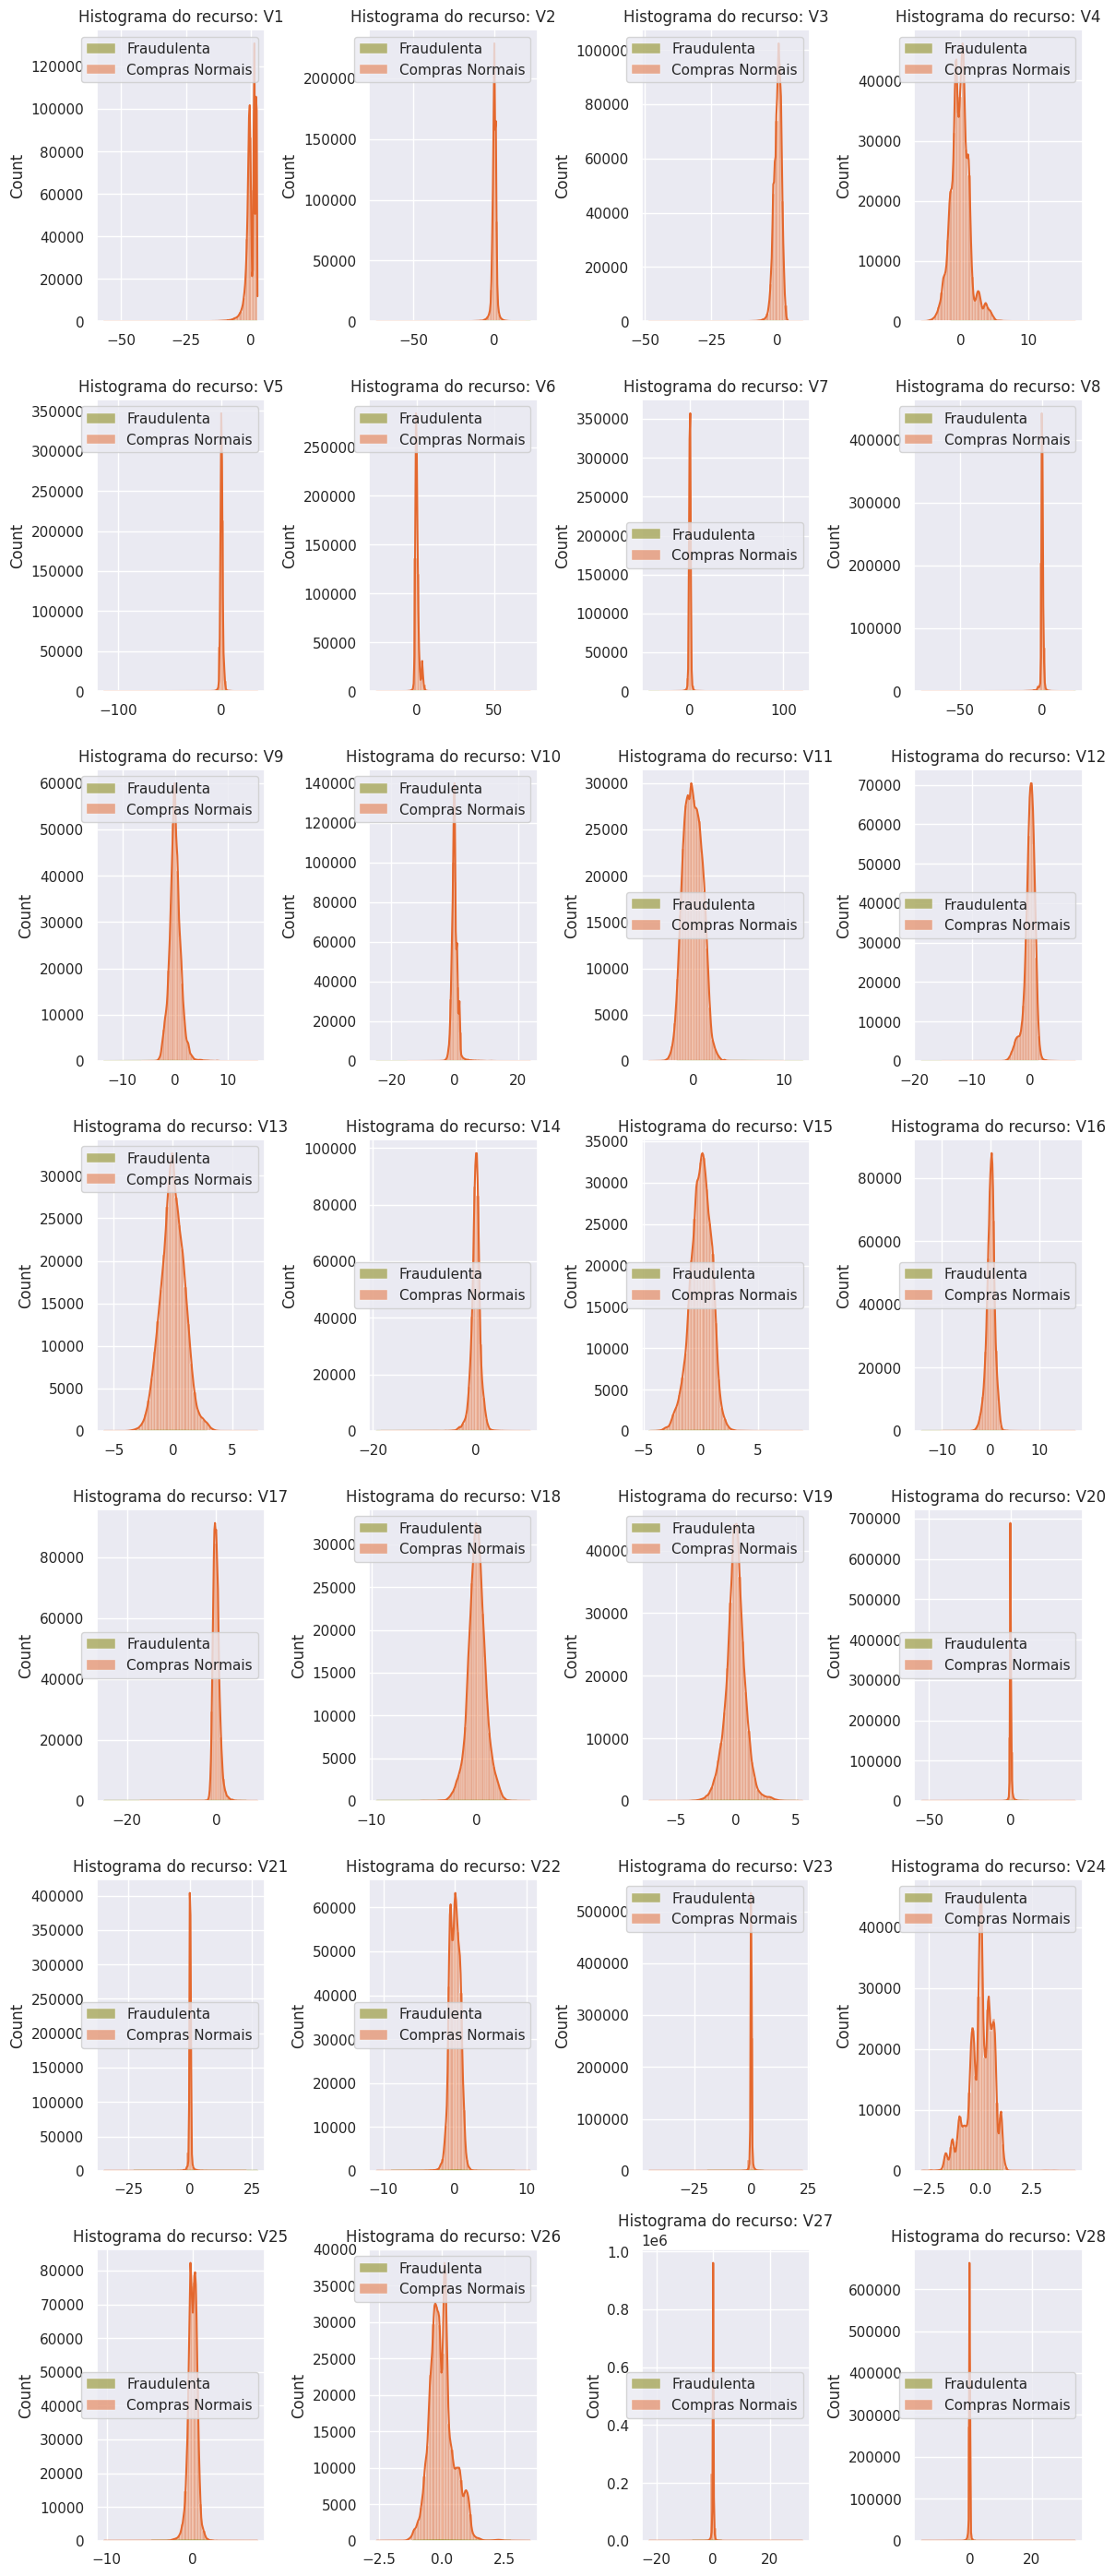

In [ ]:
PCA_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(len(PCA_features), 4)
for i, cn in enumerate(PCA_features):
    ax = plt.subplot(gs[i])
    sns.histplot(df[cn][df.Class == 1], bins=50, color='#808000', kde=True, label='Fraudulenta', alpha=0.5)
    sns.histplot(df[cn][df.Class == 0], bins=50, color='#e4682e', kde=True, label='Compras Normais', alpha=0.5)
    ax.set_xlabel('')
    ax.set_title('Histograma do recurso: ' + str(cn))
    ax.legend()

plt.tight_layout()
plt.show()

Vemos que algumas variaveis são muito semelhantes,isso pode ser um problema, onde essas variaveis não terão importância para detecção de transação Fraudulenta, sendo que elas se tornam dificeis de poder identificar e separar o que é uma fraude e o que é normal, mas para ter certeza disso vamos observar agora na prática.

# Padronização dos dados

Nessa etapa iremos transformar os dados, para evitar que o algoritimo fique enviesado para as variaveis que possuem maior ordem de grandeza.

Aqui utilizaremos o **StandardScaler()** que é uma classe da biblioteca scikit-learn que é usada para normalizar (escalar) os recursos em um conjunto de dados.

Vamos fazer uma cópia do dataframa, padronizar as colunas Amount e times, por fim vamos mostrar os dados transformados.

In [ ]:
# Copia do dataframe
df_clean = df.copy()

# Padronizar as colunas Time e Amount
scaler = StandardScaler()
df_clean['Amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['Time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

#ver as 5 primeiras linhas

df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Particionamento de Treino e Teste


É uma convenção separar uma quantidade de dados do dataframe para treinar o modelo de Machine Learning e com outra parte usar para testá-la, ou seja, ver se irá atingir um bom desempenho na verificação de fraudes

Os dados de treino representam cerca de 70% da totalidade, enquanto os dados de teste representam 30%. Para fazermos isso vamos separar o dataframe em dois:

X – Corresponde a todas as variáveis (Amount, time, V1 à V28)

y – Corresponde a resposta (Class).

O passo seguinte é usar a função train_test_split que irá separar dados  em treino e teste correspondendo respectivamente as variáveis independentes (X_train, X_test) e variáveis dependentes  (y_train, y_test).

O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos anteriormente.

In [ ]:
X = df_clean.drop('Class', axis=1)

y = df_clean.Class

#separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Cross Validation e Regressão logística


A Regressão Logística é um algoritmo de Aprendizado de Máquina utilizado para a classificação de problemas, é um algoritmo de análise preditiva e baseado no conceito de probabilidade.


Usaremos a função **LogisticRegression()** para treinar o modelo.

E esta função vai ser usada para estimar a probabilidade da classe. Ou seja, vou calcular a probabilidade de y ser igual a zero para os dados que observei os atributos (X). O mesmo acontecerá para avaliar a probabilidade de y ser igual a 1.


Vamos começar a treinar modelo.

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

importance = model.coef_[0]

Precisamos tentar prever os valores para os dados não treinados (X_teste), testar o nosso modelo, e é quando a função predict() entra em cena.

In [ ]:
y_pred = model.predict(X_test)

A validação cruzada é outra maneira de avaliar a capacidade de generalização de um modelo. Em vez de dividir os dados em conjunto de treinamento e teste, a validação cruzada divide os dados em vários conjuntos menores, chamados folds, e usa cada fold uma vez para avaliar o modelo e as outras vezes para treiná-lo. A validação cruzada é particularmente útil quando temos um conjunto de dados pequeno.

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)

print("Acurácia: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Acurácia: 99.89% (0.02%)


Neste exemplo, estamos usando a validação cruzada com 5 folds (n_splits=5). Estamos usando o KFold do scikit-learn para dividir os dados em folds e o cross_val_score para avaliar o desempenho do modelo em cada fold. Estamos usando a regressão logística (LogisticRegression) como algoritmo de aprendizado de máquina. A saída nos dará a acurácia média e o desvio padrão em todas as folds.

 "Acurácia: 99.89% (0.02%)" indica que o modelo de aprendizado de máquina que foi utilizado apresentou uma acurácia média de 99.89% com um desvio padrão de 0.02%. A acurácia é uma métrica que indica a porcentagem de previsões corretas que o modelo fez. Portanto, quanto maior a acurácia, melhor o desempenho do modelo.

 No entanto, é importante lembrar que, embora a acurácia seja uma métrica útil para avaliar a precisão do modelo, ela pode ser enganosa se as classes estiverem desequilibradas no conjunto de dados. Nesse caso, outras métricas, como precisão, recall e F1-score, podem ser mais úteis para avaliar o desempenho do modelo.

# Matriz de confusão


Uma das principais maneiras de verificar o desempenho do algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (True label) e os valores previstos pelo modelo (predicted label).


- **Verdadeiro positivo (TP):** Por exemplo, quando a transação é normal e o modelo classifica como normal.
- **Falso positivo (FP):** Por exemplo, quando a transação é normal, mas o modelo classifica como fraude.
- **Falso negativo (FN):** Por exemplo, quando a transação é fraudulenta e o modelo classifica como normal.
- **Verdadeiro negativo (TN):** Por exemplo, quando a transação é fraudulenta e o modelo classifica como fraude.


Esse é o modelo da matriz de confusão, ele deixa claro o percentual de cada análise e erros. Assim conseguimos identificar qual o percentual de acerto que o nosso modelo teve na hora de detectar as fraudes, essa métrica é mais relevante, mas claro, não é só isso, precisamos analisar outras métricas para tirar uma conclusão mais precisa.

Para gerar o relatório  de classificação juntamente com a matriz de confusão, faremos o seguinte código.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996     71079
           1     0.9176    0.6341    0.7500       123

    accuracy                         0.9993     71202
   macro avg     0.9585    0.8170    0.8748     71202
weighted avg     0.9992    0.9993    0.9992     71202

AUC: 0.8170



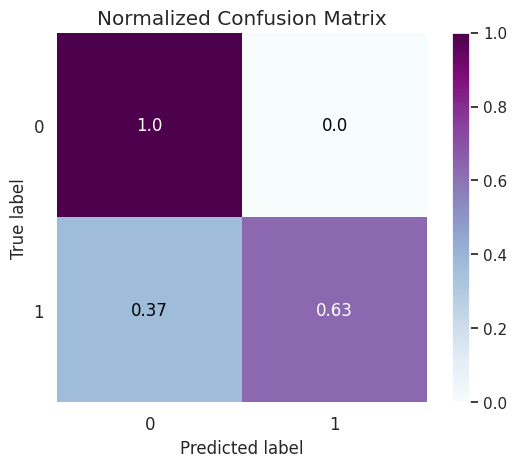

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Já percebemos que mesmo o nosso modelo dando uma acurácia bem alta, ele não foi eficaz em detectar as fraudes AUC 0,8170, conseguiu acertar apenas 63% delas. E um dos motivos, é que treinamos o nosso modelo com dados desbalanceados. Sendo assim, precisamos explorar métodos de balanceamento e ver se irá melhorar o desempenho do nosso modelo.

# Modelos de Balanceamento

Ao tratar um conjunto de dados desequilibrados como o que estamos analisando, onde a classe minoritária (fraudes) é muito menor do que a classe majoritária (não fraudes),  pode ser necessário aplicar técnicas de balanceamento de dados para melhorar o desempenho do modelo de aprendizado de máquina.

Existem alguns modelos, mas aqui nessa análise iremos usar o Oversampling que nada mais é do que auentar o número de amostras da classe minoritária e assim tronar as classes mais equilibradas, isso pode ser feito por duplicação de amostras existentes ou por geração sintética de novas amostras.

Nesse exemplo usaremos o algoritmo SMOTE, na qual irá gerar amostras sintéticas da classe minoritária para aumentar o número de amostras nessa classe, após vamos novamente de regressão logistica e plotar uma matriz de confusão

In [ ]:
# aplicando SMOTE para gerar amostras sintéticas da classe minoritária
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())

0    213236
1    213236
Name: Class, dtype: int64


Vamos avaliar a eficiencia desse modelo

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9723    0.9859     71079
           1     0.0566    0.9593    0.1069       123

    accuracy                         0.9723     71202
   macro avg     0.5283    0.9658    0.5464     71202
weighted avg     0.9983    0.9723    0.9844     71202

AUC: 0.9658



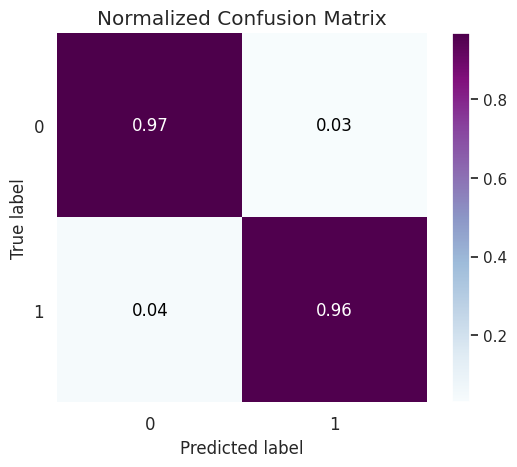

In [ ]:
#modelo de regressão logistica
model = LogisticRegression()
model.fit(X_smo, y_smo)
importance_smo = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_smo = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smo, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_smo, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_smo)))

Comparando novamente com o modelo desbalanceado a acurácia foi menor, mas teve maior eficiência na detecção de fraudes AUC 0.9658.

Para comparativo também usaremos o algaritmo RUS ou ou Random Undersampling, que tem a função de reduzir o número de amostras da classe majoritária para tornar as classes mais equilibradas. Isso pode ser feito aleatoriamente ou selecionando amostras de acordo com algum critério.

In [ ]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

0    369
1    369
Name: Class, dtype: int64


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9648    0.9821     71079
           1     0.0447    0.9512    0.0854       123

    accuracy                         0.9648     71202
   macro avg     0.5223    0.9580    0.5337     71202
weighted avg     0.9983    0.9648    0.9805     71202

AUC: 0.9580



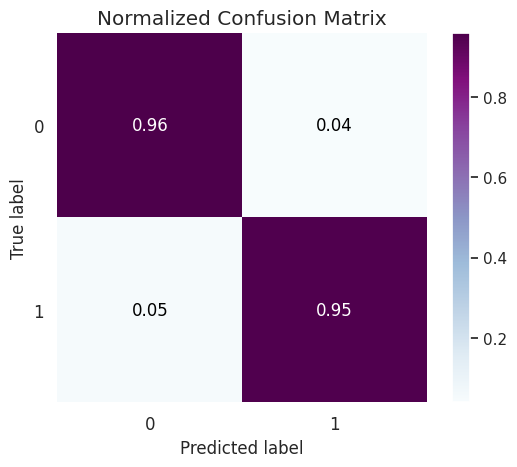

In [ ]:
model = LogisticRegression()
model.fit(X_rus, y_rus)
importance_rus = model.coef_[0]

# fazer as previsões em cima dos dados de teste
y_pred_rus = model.predict(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus, normalize=True, cmap='BuPu')
sns.despine(left=True, bottom=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rus, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_rus)))

Comparando com o modelo desbalanceado, tivemos uma redução na acurácia global 0,9648, mas aumentou bastante a assertividade na detecção de fraudes (0,9580) e reduziu o percentual de falsos negativos.

#Comparando desempenho dos modelos

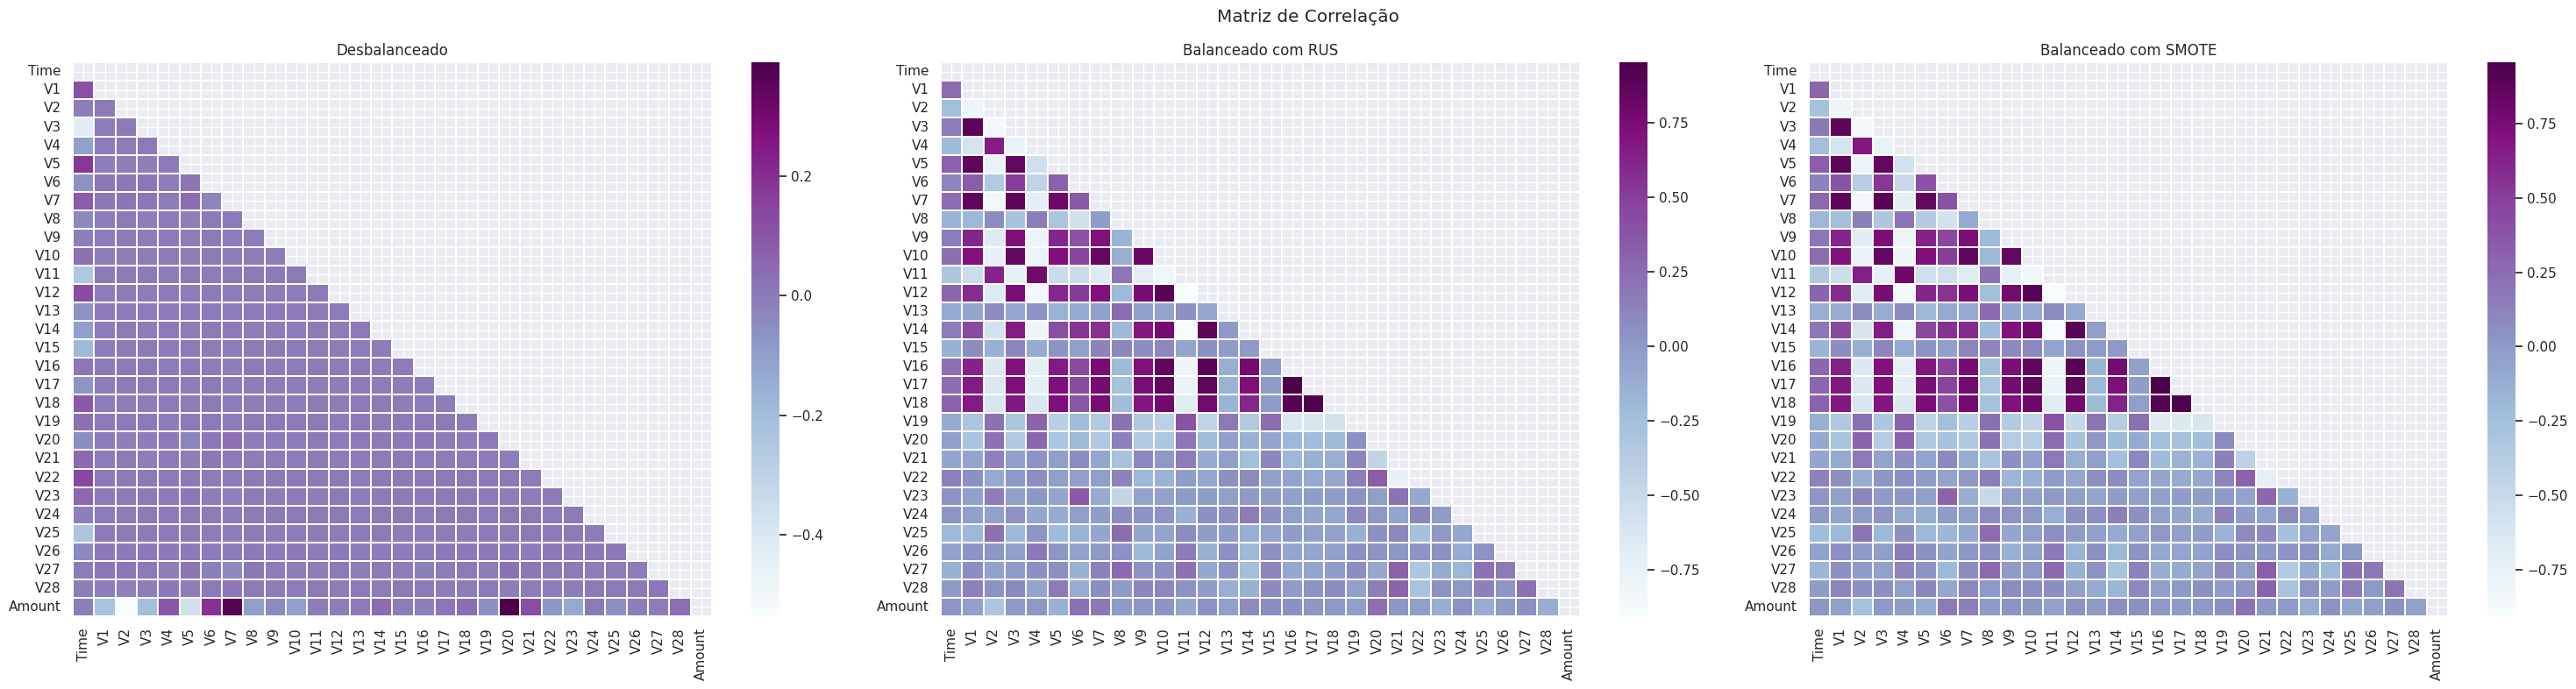

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
corr_smo = pd.DataFrame(X_smo).corr()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (30,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[0], mask=np.triu(corr))
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[1],  mask=np.triu(corr_rus))
ax[1].set_title('Balanceado com RUS')

sns.heatmap(corr_smo, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="BuPu", ax=ax[2], mask=np.triu(corr_smo))
ax[2].set_title('Balanceado com SMOTE')

plt.tight_layout()

Aqui conseguimos ver quais variaveis se correlacionam proporsional ou inversamente, nesse caso ao olhar para as métricas, parece que os modelos treinados nos conjuntos de dados balanceados têm um desempenho melhor do que o modelo treinado no conjunto de dados original. Além disso, o modelo treinado no conjunto de dados balanceado com "SMOTE" parece ter um desempenho um pouco melhor do que o modelo treinado com "RandomUnderSampler".

Os modelos de regressão logística são instanciados e se ajustam da mesma forma utilizando o atributo coef_ que contém os coeficientes encontrados para cada variável de entrada. Esses coeficientes indicam o efeito que cada recurso tem na variável de saída (no caso, se a transação é fraudulenta ou não).

Para isso vamos buscar no nosso modelo a importância do nosso melhor modelo (SMOTE), já coletado  e assim gerar um plot com as variáveis mais importantes.

Text(0.5, 1.0, 'Importância de cada feature')

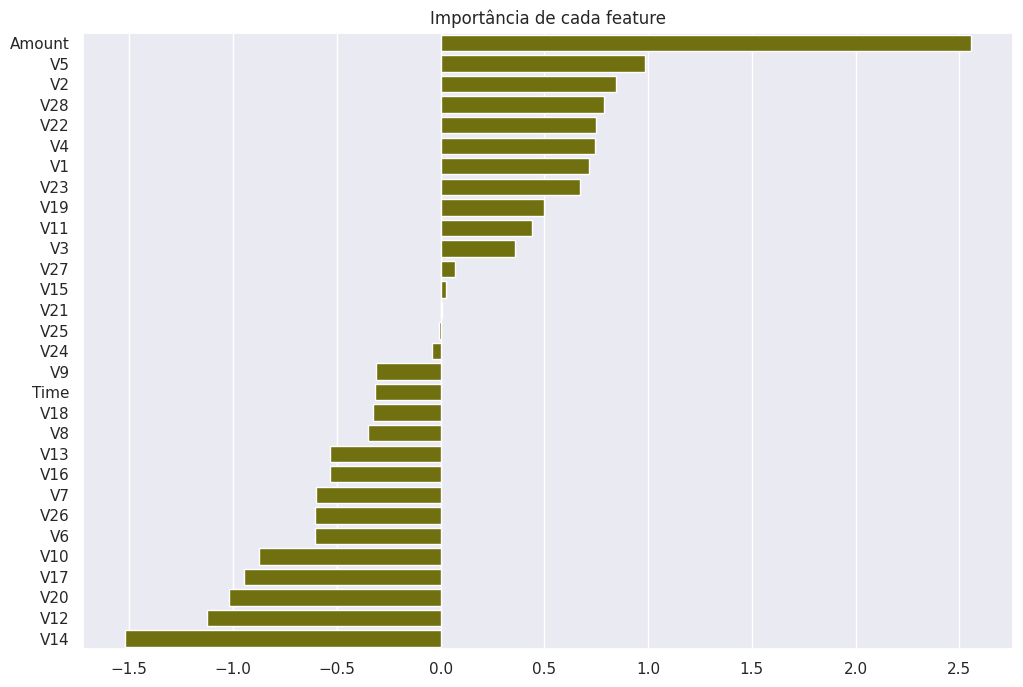

In [ ]:
importances = pd.Series(data=importance_smo, index=X.columns.values)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=importances, y=importances.index, orient='h', color='#808000')

ax.set_title('Importância de cada feature')

Esse gráfico de barras mostra a importância de cada recurso para o modelo de regressão logística treinado com o conjunto de dados balanceado usando a técnica de oversampling "SMOTE". Cada recurso é representado por uma barra no gráfico, com a altura da barra representando a importância do recurso. Os recursos mais importantes estão localizados no topo do gráfico.

E analisando nosso gráfico então, notamos que a variável Amount, é a que mais impacta na detecção de fraudes, já o V14 é a mais importante para predizer as transações normais.